# Perform Clustering(Hierarchical, Kmeans & DBSCAN) for the crime data and identify the number of clusters formed and draw inferences.

Data Description:
Murder -- Muder rates in different places of United States
Assualt- Assualt rate in different places of United States
UrbanPop - urban population in different places of United States
Rape - Rape rate in different places of United States


In [6]:
import pandas as pd
df=pd.read_csv("crime_data.csv")
df


,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6
5,Colorado,7.9,204,78,38.7
6,Connecticut,3.3,110,77,11.1
7,Delaware,5.9,238,72,15.8
8,Florida,15.4,335,80,31.9
9,Georgia,17.4,211,60,25.8


In [7]:
df.shape

(50, 5)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  50 non-null     object 
 1   Murder      50 non-null     float64
 2   Assault     50 non-null     int64  
 3   UrbanPop    50 non-null     int64  
 4   Rape        50 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 2.1+ KB


In [10]:
df.describe()

,Murder,Assault,UrbanPop,Rape
count,50.00000,50.000000,50.000000,50.000000
mean,7.78800,170.760000,65.540000,21.232000
std,4.35551,83.337661,14.474763,9.366385
min,0.80000,45.000000,32.000000,7.300000
25%,4.07500,109.000000,54.500000,15.075000
50%,7.25000,159.000000,66.000000,20.100000
75%,11.25000,249.000000,77.750000,26.175000
max,17.40000,337.000000,91.000000,46.000000


In [11]:
df.corr()

,Murder,Assault,UrbanPop,Rape
Murder,1.000000,0.801873,0.069573,0.563579
Assault,0.801873,1.000000,0.258872,0.665241
UrbanPop,0.069573,0.258872,1.000000,0.411341
Rape,0.563579,0.665241,0.411341,1.000000


In [12]:
df1 = df.iloc[:,1:]


# Heirarchal Clustering


In [13]:
from sklearn.cluster import AgglomerativeClustering


In [14]:
hc = AgglomerativeClustering(n_clusters = 5, affinity = 'euclidean', linkage = 'single')
y=hc.fit_predict(df1)
ynew = pd.DataFrame(y)
ynew.value_counts()

0    34
1    13
2     1
3     1
4     1
dtype: int64

In [15]:
hc = AgglomerativeClustering(n_clusters = 5, affinity = 'euclidean', linkage = 'complete')
y=hc.fit_predict(df1)
ynew = pd.DataFrame(y)
ynew.value_counts() 

0    14
1    14
2    10
4    10
3     2
dtype: int64

In [16]:
hc = AgglomerativeClustering(n_clusters = 5, affinity = 'euclidean', linkage = 'average')
y=hc.fit_predict(df1)
ynew = pd.DataFrame(y)
ynew.value_counts()

0    14
1    14
2    10
4    10
3     2
dtype: int64

In [17]:
hc = AgglomerativeClustering(n_clusters = 5, affinity = 'euclidean', linkage = 'ward')
y=hc.fit_predict(df1)
ynew = pd.DataFrame(y)
ynew.value_counts()

0    14
1    10
3    10
4    10
2     6
dtype: int64

In [18]:
df['hc_cluster_id'] = ynew
df

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,hc_cluster_id
0,Alabama,13.2,236,58,21.2,1
1,Alaska,10.0,263,48,44.5,1
2,Arizona,8.1,294,80,31.0,2
3,Arkansas,8.8,190,50,19.5,0
4,California,9.0,276,91,40.6,2
5,Colorado,7.9,204,78,38.7,0
6,Connecticut,3.3,110,77,11.1,3
7,Delaware,5.9,238,72,15.8,1
8,Florida,15.4,335,80,31.9,2
9,Georgia,17.4,211,60,25.8,0


From the above data we can conclude that in Hierarchal clustering method we can conclude that ward linkage is best



# K-Means Clustering


In [19]:
df2= df
df2 = df2.drop('hc_cluster_id', axis =1)
df2

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6
5,Colorado,7.9,204,78,38.7
6,Connecticut,3.3,110,77,11.1
7,Delaware,5.9,238,72,15.8
8,Florida,15.4,335,80,31.9
9,Georgia,17.4,211,60,25.8


In [20]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters = 5)
km.fit(df1)
labels = km.predict(df1)
y= pd.DataFrame(labels)
y.value_counts()

2    13
1    11
0    10
3    10
4     6
dtype: int64

In [21]:
km.inertia_


24495.167543123538

In [22]:
li = []
for i in range(1,15):
    k = KMeans(n_clusters = i)
    k.fit(df1)
    li.append(k.inertia_)

C:\Users\abdul\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [23]:
import numpy as np
np.mean(li)

47056.30791712409

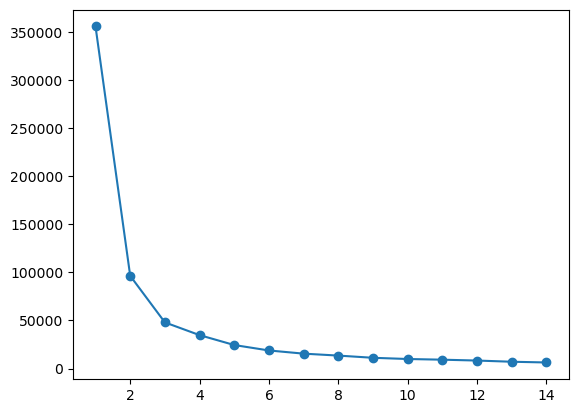

In [24]:
import matplotlib.pyplot as plt
plt.scatter(range(1,15),li)
plt.plot(range(1,15),li)
plt.show()

# DBSCAN


In [25]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

In [26]:
SS_X = StandardScaler().fit_transform(df1)
SS_X = pd.DataFrame(SS_X)
SS_X.columns = list(df1)

In [27]:
db = DBSCAN(eps = 1,min_samples = 3)
db.fit(SS_X)
y=db.labels_
ynew=pd.DataFrame(y)
ynew.value_counts()

 1    28
-1    10
 0     6
 2     3
 3     3
dtype: int64

In [28]:
db = DBSCAN(eps = 0.5,min_samples = 3)
db.fit(SS_X)
y=db.labels_
ynew=pd.DataFrame(y)
ynew.value_counts()

-1    50
dtype: int64

In [29]:
db = DBSCAN(eps = 0.1,min_samples = 3)
db.fit(SS_X)
y=db.labels_
ynew=pd.DataFrame(y)
ynew.value_counts()

-1    50
dtype: int64

In [30]:
db = DBSCAN(eps = 1.5,min_samples = 3)
db.fit(SS_X)
y=db.labels_
ynew=pd.DataFrame(y)
ynew.value_counts()

 0    49
-1     1
dtype: int64

# Perform clustering (hierarchical,K means clustering and DBSCAN) for the airlines data to obtain optimum number of clusters. 
Draw the inferences from the clusters obtained.

Data Description:
 
The file EastWestAirlinescontains information on passengers who belong to an airline’s frequent flier program. For each passenger the data include information on their mileage history and on different ways they accrued or spent miles in the last year. The goal is to try to identify clusters of passengers that have similar characteristics for the purpose of targeting different segments for different types of mileage offers

ID --Unique ID

Balance--Number of miles eligible for award travel

Qual_mile--Number of miles counted as qualifying for Topflight status

cc1_miles -- Number of miles earned with freq. flyer credit card in the past 12 months:
cc2_miles -- Number of miles earned with Rewards credit card in the past 12 months:
cc3_miles -- Number of miles earned with Small Business credit card in the past 12 months:

1 = under 5,000
2 = 5,000 - 10,000
3 = 10,001 - 25,000
4 = 25,001 - 50,000
5 = over 50,000

Bonus_miles--Number of miles earned from non-flight bonus transactions in the past 12 months

Bonus_trans--Number of non-flight bonus transactions in the past 12 months

Flight_miles_12mo--Number of flight miles in the past 12 months

Flight_trans_12--Number of flight transactions in the past 12 months

Days_since_enrolled--Number of days since enrolled in flier program

Award--whether that person had award flight (free flight) or not




In [31]:
import pandas as pd
import scipy.cluster.hierarchy as sch
df = pd.read_excel('EastWestAirlines.xlsx', sheet_name =1)
df.to_csv('EastWestAirlines.csv', index=False)
df1 = pd.read_csv("EastWestAirlines.csv")
df1

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0


In [33]:
df.shape


(3999, 12)

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ID#                3999 non-null   int64
 1   Balance            3999 non-null   int64
 2   Qual_miles         3999 non-null   int64
 3   cc1_miles          3999 non-null   int64
 4   cc2_miles          3999 non-null   int64
 5   cc3_miles          3999 non-null   int64
 6   Bonus_miles        3999 non-null   int64
 7   Bonus_trans        3999 non-null   int64
 8   Flight_miles_12mo  3999 non-null   int64
 9   Flight_trans_12    3999 non-null   int64
 10  Days_since_enroll  3999 non-null   int64
 11  Award?             3999 non-null   int64
dtypes: int64(12)
memory usage: 375.0 KB


# Hierarchical clustering


In [35]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 5, affinity='euclidean', linkage='single')
y = hc.fit_predict(df)

In [36]:
y_new = pd.DataFrame(y,columns=['Clusters'])
y_new.value_counts()

Clusters
0           3993
1              3
2              1
3              1
4              1
dtype: int64

In [37]:
hc=AgglomerativeClustering(n_clusters = 5, affinity = 'euclidean', linkage = 'complete')
y=hc.fit_predict(df)
y_new = pd.DataFrame(y, columns = ['Clusters'])
y_new.value_counts()

Clusters
1           3835
2            138
0             21
4              4
3              1
dtype: int64

In [38]:
hc=AgglomerativeClustering(n_clusters = 5, affinity = 'euclidean', linkage = 'average')
y=hc.fit_predict(df)
y_new = pd.DataFrame(y, columns = ['Clusters'])
y_new.value_counts()

Clusters
0           3961
2             28
4              5
1              4
3              1
dtype: int64

In [39]:
hc=AgglomerativeClustering(n_clusters = 5, affinity = 'euclidean', linkage = 'ward')
y=hc.fit_predict(df)
y_new = pd.DataFrame(y, columns = ['Clusters'])
y_new.value_counts()

Clusters
3           2122
1           1488
2            290
4             73
0             26
dtype: int64

Based on above data we can see that by using Hierarchical clustering method we can conclude that ward linkage has better clusters



# K-Means Clustering


In [40]:
from sklearn.cluster import KMeans


In [41]:
km = KMeans(n_clusters = 5)
km.fit(df)
y=km.predict(df)
ynew = pd.DataFrame(y, columns=['Clusters'])
ynew.value_counts()

Clusters
1           2502
0           1048
4            342
3             88
2             19
dtype: int64

In [42]:
km.inertia_


5729598332422.261

In [43]:
l1=[]
for i in range(1,12):
    km  = KMeans(n_clusters = i)
    km.fit(df)
    l1.append(km.inertia_)

In [44]:
import numpy
numpy.mean(l1)

9848516968926.545

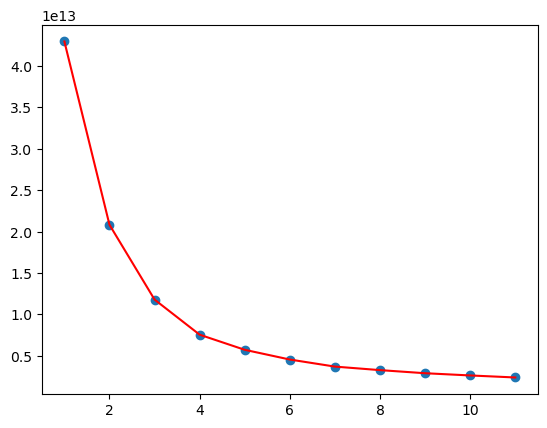

In [45]:
import matplotlib.pyplot as plt
plt.scatter(range(1,12),l1)
plt.plot(range(1,12),l1, color='red')
plt.show()

# DBSCAN


In [46]:
from sklearn.preprocessing import StandardScaler
SS_X = pd.DataFrame(StandardScaler().fit_transform(df))
SS_X.columns = list(df)

In [47]:
from sklearn.cluster import DBSCAN
db = DBSCAN(eps=1, min_samples=3)
db.fit(SS_X)
y=db.labels_
ynew=pd.DataFrame(y)
ynew.value_counts()

 0     2305
 1     1071
-1      562
 3       13
 11       8
 2        7
 12       6
 4        4
 6        4
 8        4
 5        3
 7        3
 9        3
 10       3
 13       3
dtype: int64

In [48]:
db = DBSCAN(eps=0.5, min_samples=3)
db.fit(SS_X)
y=db.labels_
ynew=pd.DataFrame(y)
ynew.value_counts()

 0     1429
-1     1420
 1      239
 7      227
 16     132
 2      102
 9      100
 8       86
 6       25
 40      20
 18      15
 25      13
 19      10
 10       9
 47       8
 12       7
 24       6
 54       5
 3        5
 31       5
 42       5
 53       5
 37       4
 48       4
 46       4
 27       4
 56       4
 52       4
 29       4
 58       4
 4        4
 5        4
 20       4
 26       4
 45       3
 57       3
 55       3
 11       3
 13       3
 51       3
 50       3
 49       3
 14       3
 15       3
 17       3
 28       3
 44       3
 41       3
 21       3
 39       3
 38       3
 22       3
 36       3
 35       3
 34       3
 33       3
 32       3
 23       3
 30       3
 43       3
dtype: int64

In [49]:
db = DBSCAN(eps=0.3, min_samples=3)
db.fit(SS_X)
y=db.labels_
ynew=pd.DataFrame(y)
ynew.value_counts()

-1     2418
 0     1077
 14      41
 35      26
 44      22
       ... 
 3        3
 50       3
 1        3
 53       3
 46       3
Length: 78, dtype: int64

In [50]:
db = DBSCAN(eps=1.5, min_samples=3)
db.fit(SS_X)
y=db.labels_
ynew=pd.DataFrame(y)
ynew.value_counts()


 0    2410
 1    1237
-1     308
 2      15
 3       8
 6       4
 7       4
 9       4
 4       3
 5       3
 8       3
dtype: int64

Hence we can observe that by decreasing the radius we can conclude the number of noise data points are increasing and vice versa